In [1]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn import preprocessing

In [2]:
#load the dataset
training_variants = pd.read_csv('training_variants.csv')
training_text = pd.read_csv('training_text.csv',sep='\|\|', skiprows=1, engine='python',names=["ID","text"])

In [3]:
# EDA 
training_variants.head(10)

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4
5,5,CBL,V391I,4
6,6,CBL,V430M,5
7,7,CBL,Deletion,1
8,8,CBL,Y371H,4
9,9,CBL,C384R,4


In [4]:
# EDA
training_text.head(10)

,ID,text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...
5,5,Oncogenic mutations in the monomeric Casitas B...
6,6,Oncogenic mutations in the monomeric Casitas B...
7,7,CBL is a negative regulator of activated recep...
8,8,Abstract Juvenile myelomonocytic leukemia (JM...
9,9,Abstract Juvenile myelomonocytic leukemia (JM...


In [5]:
# EDA
training_variants.describe

<bound method NDFrame.describe of         ID    Gene             Variation  Class
0        0  FAM58A  Truncating Mutations      1
1        1     CBL                 W802*      2
2        2     CBL                 Q249E      2
3        3     CBL                 N454D      3
4        4     CBL                 L399V      4
5        5     CBL                 V391I      4
6        6     CBL                 V430M      5
7        7     CBL              Deletion      1
8        8     CBL                 Y371H      4
9        9     CBL                 C384R      4
10      10     CBL                 P395A      4
11      11     CBL                 K382E      4
12      12     CBL                 R420Q      4
13      13     CBL                 C381A      4
14      14     CBL                 P428L      5
15      15     CBL                 D390Y      4
16      16     CBL  Truncating Mutations      1
17      17     CBL                 Q367P      4
18      18     CBL                 M374V      5
19    

In [6]:
# EDA
training_text.describe

<bound method NDFrame.describe of         ID                                               text
0        0  Cyclin-dependent kinases (CDKs) regulate a var...
1        1   Abstract Background  Non-small cell lung canc...
2        2   Abstract Background  Non-small cell lung canc...
3        3  Recent evidence has demonstrated that acquired...
4        4  Oncogenic mutations in the monomeric Casitas B...
5        5  Oncogenic mutations in the monomeric Casitas B...
6        6  Oncogenic mutations in the monomeric Casitas B...
7        7  CBL is a negative regulator of activated recep...
8        8   Abstract Juvenile myelomonocytic leukemia (JM...
9        9   Abstract Juvenile myelomonocytic leukemia (JM...
10      10  Oncogenic mutations in the monomeric Casitas B...
11      11  Noonan syndrome is an autosomal dominant conge...
12      12  Noonan syndrome is an autosomal dominant conge...
13      13  Noonan syndrome is an autosomal dominant conge...
14      14  Oncogenic mutations in t

In [7]:
# EDA
training_variants.shape

(3321, 4)

In [8]:
# EDA
training_text.shape

(3321, 2)

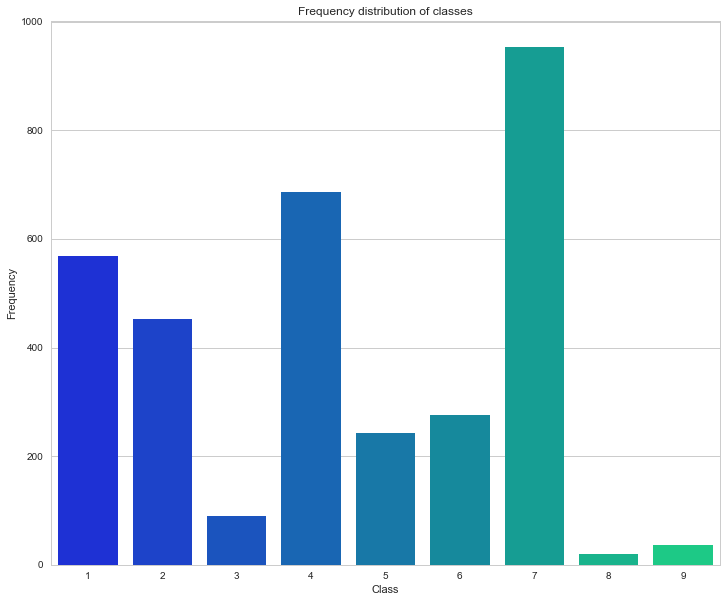

In [9]:
# quick visualization of frequency of classes 1-9
sns.set(style="whitegrid", color_codes=True)

plt.figure(figsize=(12,10))
ax = sns.countplot(x="Class", data=training_variants,palette="winter")
plt.ylabel('Frequency')
plt.xlabel('Class')
plt.title('Frequency distribution of classes')
plt.show()

In [10]:
# Find out unique Genes
unique_genes = list(training_variants.Gene.unique())

In [11]:
unique_genes[:10]

['FAM58A',
 'CBL',
 'SHOC2',
 'TERT',
 'DICER1',
 'PTPRT',
 'RHEB',
 'SHQ1',
 'CCND2',
 'RAD50']

In [12]:
#There are 264 unique genes
len(unique_genes)

264

In [13]:
# Find out unique variation
unique_variation = list(training_variants.Variation.unique())

In [14]:
unique_variation[:10]

['Truncating Mutations',
 'W802*',
 'Q249E',
 'N454D',
 'L399V',
 'V391I',
 'V430M',
 'Deletion',
 'Y371H',
 'C384R']

In [15]:
#There are 2996 unique variations
len(unique_variation)

2996

In [3]:
# remove stopwords and do the stemming
corpus = []
for i in range(0, 3321):
    review = re.sub('[^a-zA-Z]', ' ', training_text['text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [5]:
corpus[:2]

['cyclin depend kinas cdk regul varieti fundament cellular process cdk stand one last orphan cdk activ cyclin identifi kinas activ reveal previou work shown cdk silenc increas et v et erythroblastosi viru e oncogen homolog driven activ mapk pathway confer tamoxifen resist breast cancer cell precis mechan cdk modul et activ gener function cdk remain elus demonstr cdk cyclin depend kinas identifi cyclin activ cyclin cyclin orphan cyclin product fam whose mutat caus star syndrom human development anomali whose featur includ toe syndactyli telecanthu anogenit renal malform show star syndrom associ cyclin mutant unabl interact cdk cyclin silenc phenocopi cdk silenc increas c raf confer tamoxifen resist breast cancer cell cdk cyclin phosphoryl et vitro cell posit control et degrad proteasom et protein level increas cell deriv star patient increas attribut decreas cyclin level altogeth result reveal addit regulatori mechan et play key role cancer develop also shed light molecular mechan under

In [8]:
word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(corpus)
frequencies = sum(sparse_matrix).toarray()[0]
df=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
df.sort_values('frequency', ascending = False, inplace = True)

In [11]:
df[:200]

,frequency
mutat,372738
cell,313220
activ,194042
express,127028
mutant,126727
protein,125628
tumor,123192
cancer,121856
use,115451
patient,111606
